<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общий-анализ-данных" data-toc-modified-id="Общий-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общий анализ данных</a></span><ul class="toc-item"><li><span><a href="#Contracts" data-toc-modified-id="Contracts-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Contracts</a></span></li><li><span><a href="#Personal" data-toc-modified-id="Personal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Personal</a></span></li><li><span><a href="#Internet" data-toc-modified-id="Internet-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Internet</a></span></li><li><span><a href="#Phone" data-toc-modified-id="Phone-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Phone</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Проверка-мультиколлинеарности" data-toc-modified-id="Проверка-мультиколлинеарности-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка мультиколлинеарности</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Тестирование-модели-CatBoost" data-toc-modified-id="Тестирование-модели-CatBoost-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели CatBoost</a></span></li><li><span><a href="#Отчёт" data-toc-modified-id="Отчёт-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отчёт</a></span></li></ul></div>

# Прогнозирование оттока клиентов оператора связи

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

**Цель работы:**
- Разработать модель машинного обучения для прогнозирования оттока клиентов оператора связи, которая поможет бизнесу сохранить клиентов

**Задачи работы:**
- Провести общий анализ данных
- Выявить интересные особенности и закономерности, влияющие на решение пользователей о разрыве контракта с оператором
- Подобрать оптимальный алгоритм машинного обучения, опираясь на требования и условия заказчика
- Подготовить итоговый отчет о проведенном исследовании

**Таким образом, мое иследование пройдет в 10 этапов:**
- Предобработка данных
- Соединение данных в единый датасет
- Проведение исследовательского анализа данных, создание новых признаков
- Разделение данных на обучающую и тестовую выборки
- Выявление взаимосвязей между признаками
- Стандартизация данных
- Подбор и оптимизация нескольких алгоритмов машинного обучения
- Тестирование лучшего алгоритма машинного обучения
- Проведение оценки важности признаков лучшей модели и построение матрицы ошибок
- Подготовка итогового отчета по проведенному исследованию

## Общий анализ данных

Импортируем нужные для исследования библиотеки

In [59]:
#план
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix

#код

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

RANDOM_STATE = 50623
END_DATE = pd.to_datetime('2020-02-01', format='%Y-%m-%d')

### Contracts

In [2]:
contracts = pd.read_csv('datasets/contract_new.csv')
contracts.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [3]:
contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Как видно из таблицы выше, в датасете присутствуют ошибки типов данных, потому изменим:
- *BeginDate* на *DateTime*
- *TotalCharges* на float
- Целевой признак *target* создадим на основе признака *EndDate* приведенном к бинарному представлению

Для приведения целевого признака к бинарному представлению создадим функцию *to_binary*, принимающую на вход целевой столбец и возвращающую приобразованный список ("No" = 0, "DateTime" = 1)

In [4]:
def to_binary(column):
    result = []
    for i in column:
        if i == 'No':
            result.append(0)
        else:
            result.append(1)
    return result

In [5]:
contracts['BeginDate'] = pd.to_datetime(contracts['BeginDate'], format='%Y-%m-%d')
contracts['TotalCharges'] = pd.to_numeric(contracts['TotalCharges'], errors='coerce')

contracts['target'] = to_binary(contracts['EndDate'])

In [6]:
contracts.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0


In [7]:
contracts.describe()

,MonthlyCharges,TotalCharges,target
count,7043.000000,7032.000000,7043.000000
mean,64.761692,2118.621822,0.156325
std,30.090047,2112.736199,0.363189
min,18.250000,19.050000,0.000000
25%,35.500000,439.745000,0.000000
50%,70.350000,1345.275000,0.000000
75%,89.850000,3239.317500,0.000000
max,118.750000,9221.380000,1.000000


В датасете заметно высокое стандартное отклонение у признаков *MonthlyCharges* и *TotalCharges*, что может отразиться на итоговых показателях модели

Проверим датасет на наличие пропусков

In [8]:
contracts.isna().sum()

customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
target               0
dtype: int64

In [9]:
contracts[contracts['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN,0


Как видим, пропуски в признаке *TotalCharges* только у новых клиентов, потому заполним пропуски нулями

In [10]:
contracts['TotalCharges'] = contracts['TotalCharges'].fillna(0)

In [11]:
contracts.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
target              0
dtype: int64

Проверим датасет на наличие дубликатов

In [12]:
contracts.duplicated().sum()

0

### Personal

In [13]:
personal = pd.read_csv('datasets/personal_new.csv')
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Как видно из таблицы выше, в датасете присутствуют ошибки типов данных, которые мы исправим с помощью энкодера на послеующих этапах исследования

Проверим датасет на наличие пропусков

In [15]:
personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Проверим датасет на наличие дубликатов

In [16]:
personal.duplicated().sum()

0

### Internet

In [17]:
internet = pd.read_csv('datasets/internet_new.csv')
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [18]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Как видно из таблицы выше, в датасете присутствуют ошибки типов данных, которые мы исправим с помощью энкодера на послеующих этапах исследования

Проверим датасет на наличие пропусков

In [19]:
internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Проверим датасет на наличие дубликатов

In [20]:
internet.duplicated().sum()

0

### Phone

In [21]:
phone = pd.read_csv('datasets/phone_new.csv')
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [22]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Как видно из таблицы выше, в датасете присутствуют ошибки типов данных, которые мы исправим с помощью энкодера на послеующих этапах исследования

Проверим датасет на наличие пропусков

In [23]:
phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

Проверим датасет на наличие дубликатов

In [24]:
phone.duplicated().sum()

0

Соединим все датасеты в единый, присоединяя к *contracts* остальные 3 датасета методом *merge* с параметром *how=left* по первичному ключу *customerID*

In [25]:
data = contracts.merge(personal, on='customerID', how='left')
data = data.merge(internet, on='customerID', how='left')
data = data.merge(phone, on='customerID', how='left')

In [26]:
data.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,gender,...,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


Проверим датасет на наличие пропусков

In [27]:
data.isna().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
target                 0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

При соединении датасетов появилось множество пропусков, которые свидетельствуют о том, что не все клиенты пользуются и интернетом и услугами телефонии одновременно, потому заполним образовавшиеся пропуски нулями

In [28]:
data = data.fillna('No')

In [29]:
data.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
target              0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

По итогам общего анализа данных, можно отметить следующее:
- В количественных данных присутствует высокое стандартное отклонение, что может сильно отразиться на итоговых показателях модели
- Пропуски данных в таблице *contracts* присутствовали только у новых клиентов оператора, потому были заполненны нулями
- Пропуски в итоговой таблице были заменены нулями, так как подразумевается что клиенты не пользуются пропущенными услугами оператора

## Исследовательский анализ данных

In [30]:
cat_features = ['Type',
                'PaperlessBilling',
                'PaymentMethod',
                'gender',
                'SeniorCitizen',
                'Partner',
                'Dependents',
                'InternetService',
                'OnlineSecurity',
                'OnlineBackup',
                'DeviceProtection',
                'TechSupport',
                'StreamingTV',
                'StreamingMovies',
                'MultipleLines']


int_features = ['TimeDuration',
                'MonthlyCharges',
                'TotalCharges']

Создадим новый признак *TimeDuration*, который будет содержать продолжительность (в днях) пользования услугами оператора клиентом, а после уберем признаки *EndDate, *BeginDate* и неинформативный *customerID* из финального датасета

Для этого заменим в признаке *EndDate* значения *No* на *END_DATE* (2020-02-01), и вычтим даты *BeginDate* из *EndDate*


In [31]:
data['EndDate'] = data['EndDate'].replace({'No':pd.to_datetime(END_DATE, format='%Y-%m-%d')})
data['EndDate'] = pd.to_datetime(data['EndDate'], format='%Y-%m-%d')
data['BeginDate'] = pd.to_datetime(data['BeginDate'], format='%Y-%m-%d')

In [32]:
data['TimeDuration'] = (data['EndDate'] - data['BeginDate']).dt.days

In [33]:
data_final = data.drop(['EndDate', 'BeginDate', 'customerID'], axis=1)

In [34]:
data_final.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,TimeDuration
0,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,31
1,One year,No,Mailed check,56.95,2071.84,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1036
2,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,123
3,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1371
4,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,153


Посмотрим на соотношение действующих и расторгнувших контракт клиентов

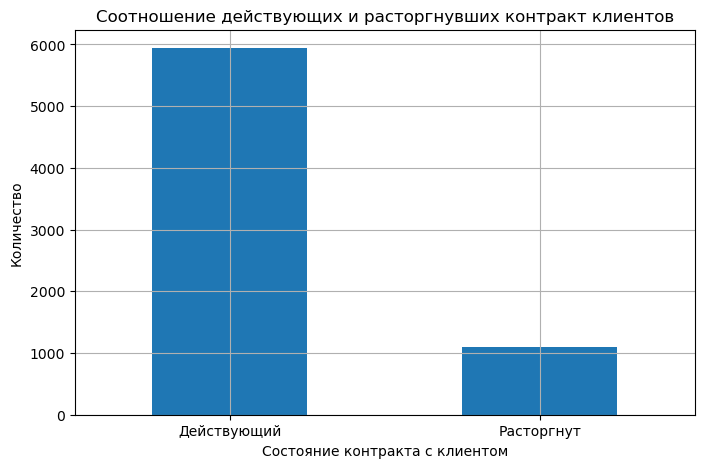

In [35]:
target_pivot = data_final.pivot_table(index='target', aggfunc='size')
target_pivot.index = ['Действующий', 'Расторгнут']

plt.figure(figsize = (8, 5))
target_pivot.plot(kind='bar', grid=True)
plt.title('Соотношение действующих и расторгнувших контракт клиентов')
plt.ylabel('Количество')
plt.xlabel('Состояние контракта с клиентом')
plt.xticks(rotation='horizontal')
plt.show()

В целевом признаке EndDate виден сильный дизбаланс классов, что так же сильно скажется на итоговой метрике accuracy

Посмотрим на распределение количественных признаков датасета

In [36]:
q_signs = ['Продолжительность пользования услугами оператора в днях',
           'Ежемесячные траты на услуги по договору',
           'Всего потрачено денег на услуги']

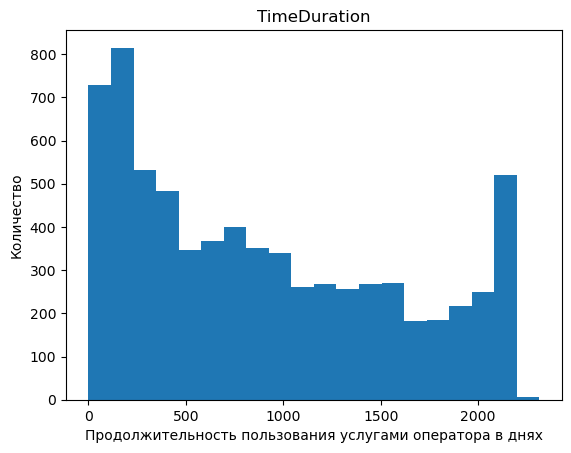

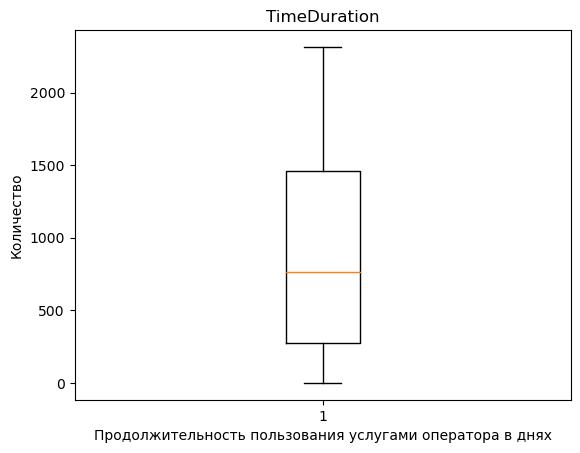

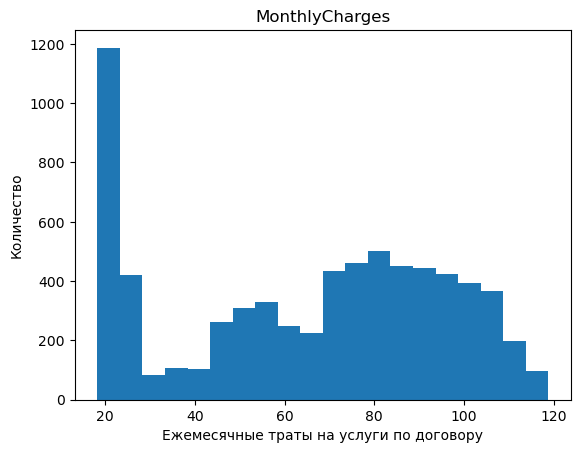

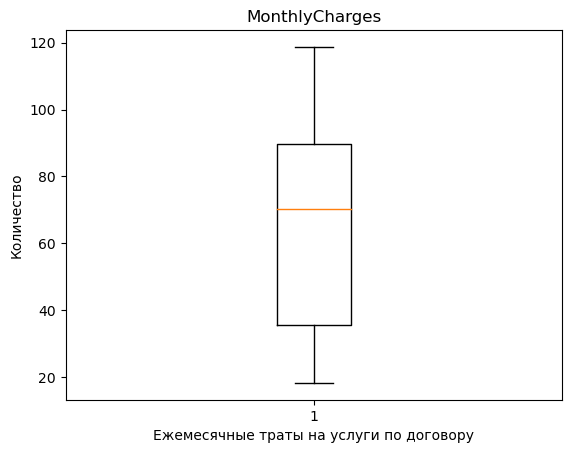

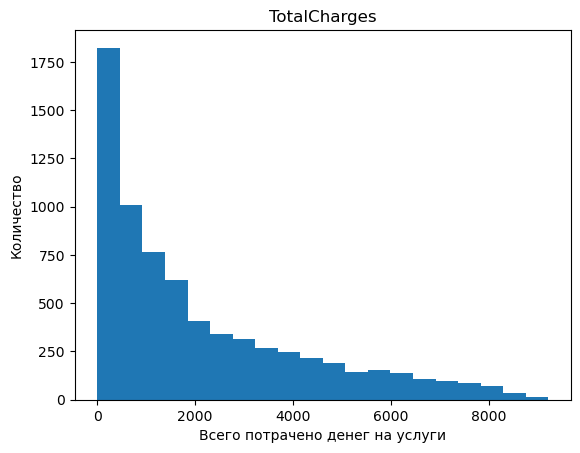

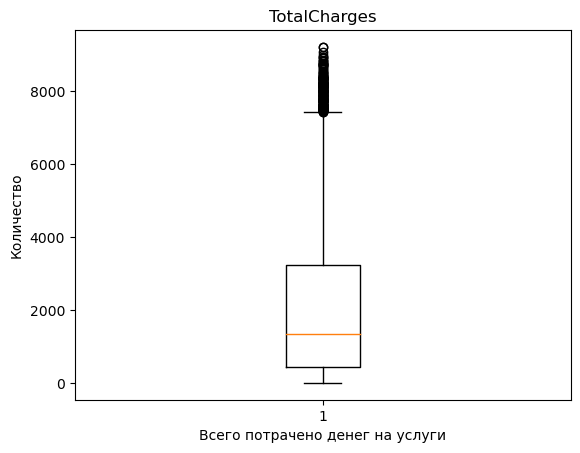

In [37]:
#i = 0
for i, col in enumerate(int_features):
    plt.hist(data[col], bins=20)
    plt.xlabel(q_signs[i])
    plt.ylabel('Количество')
    plt.title(col)
    
    plt.figure()
    plt.boxplot(data[col])
    plt.xlabel(q_signs[i])
    plt.ylabel('Количество')
    plt.title(col)
    plt.show()

Исходя из графиков можно сделать следующие выводы:
- Видны пики значений на минимальных и максимальных значениях гистограммы *TimeDuration*, что свидетельствует о том, что среди клиентов оператора много как новичков, так и много лояльных старых клиентов
- В гистограмме признака *MonthlyCharges* можно отметить, что большáя часть клиентов платят минимальные чеки, но также заметен разкий подъем, что может свидетельствовать о том, что какая-то часть клиентов, возможно, платит по старым, невыгодным для них тарифам, подробнее рассмотрим это далее
- В гистограмме признака *TotalCharges* можно отметить аномально высокий пик у нуля, что так же свидетельствует о том, что среди клиентов компании много новичков, также заметны выбросы на боксплоте, что вероятно всего свидетельствует о некотором количестве старых клиентов, заплативших оператору за все время пользования услугами большие деньги 

Посмотрим на распределение ежемесячных платежей подробнее, с семплированием в месяц

In [38]:
data_resampled_m = data[['BeginDate', 'MonthlyCharges']]

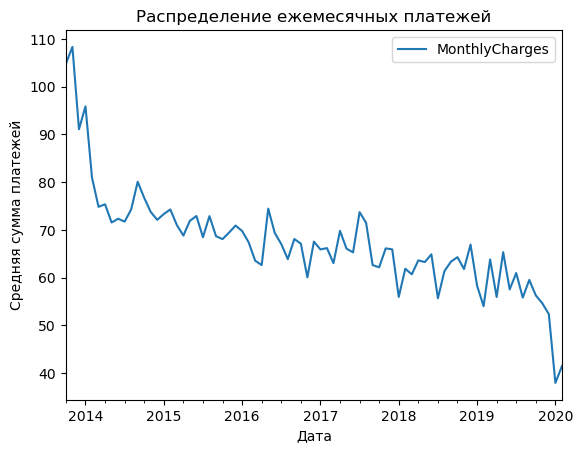

In [39]:
data_resampled_m.set_index('BeginDate').resample('1M').mean().plot()
plt.title('Распределение ежемесячных платежей')
plt.xlabel('Дата')
plt.ylabel('Средняя сумма платежей')
plt.show()

Исходя из графика можно отметить, что изначально у компании были очень дорогие тарифы, которые с течением времени начали сильно снижаться, особенно в конце 2019 года, что так же могло привести к потере старых клиентов, платящих за одни и те же услуги гораздо больше новичков

Посмотрим на показатели категориальных признаков

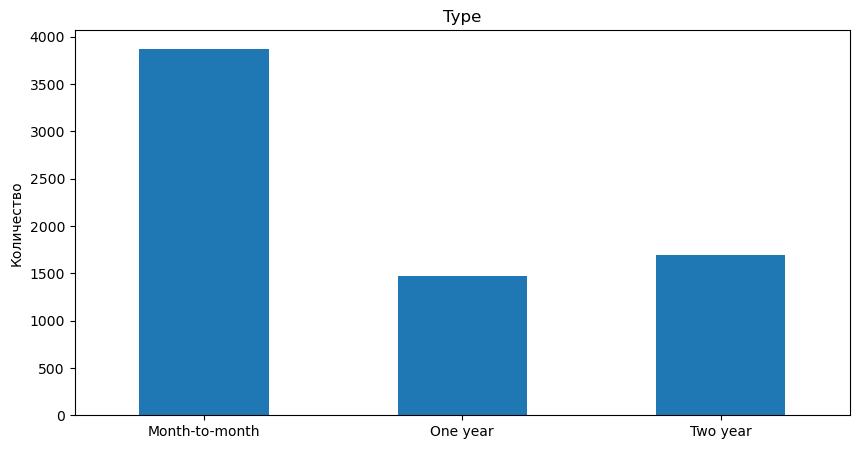

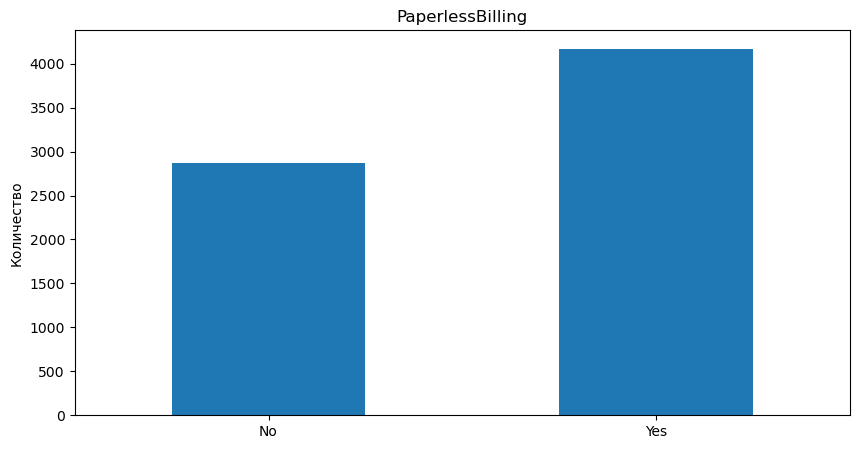

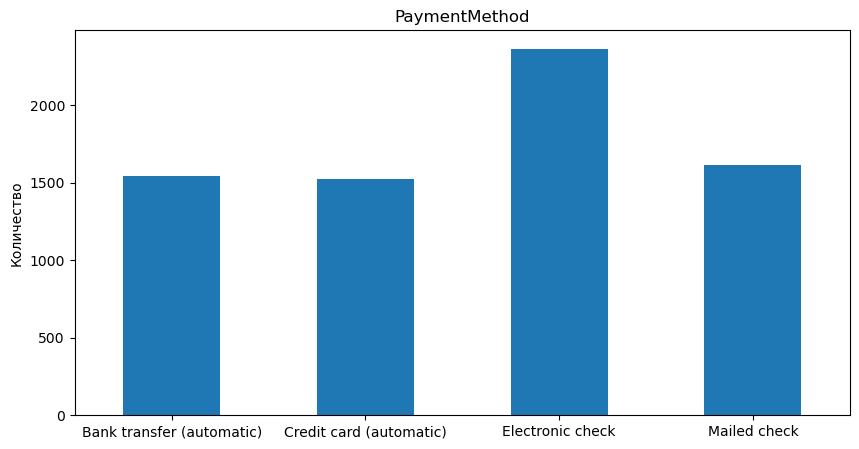

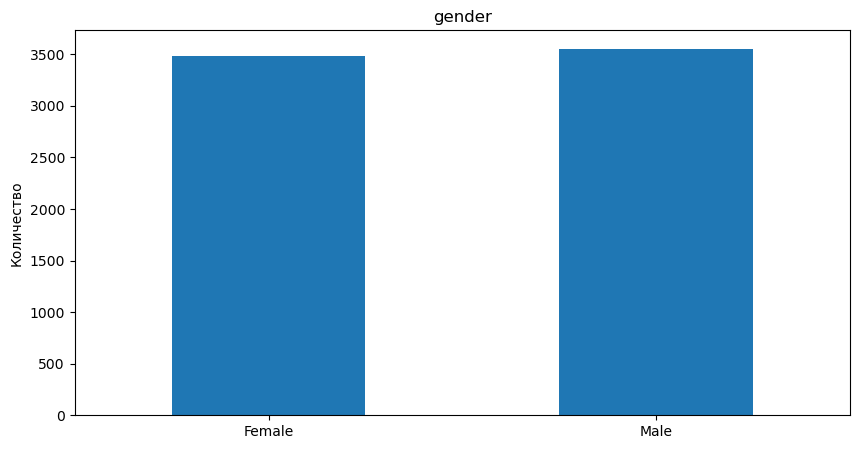

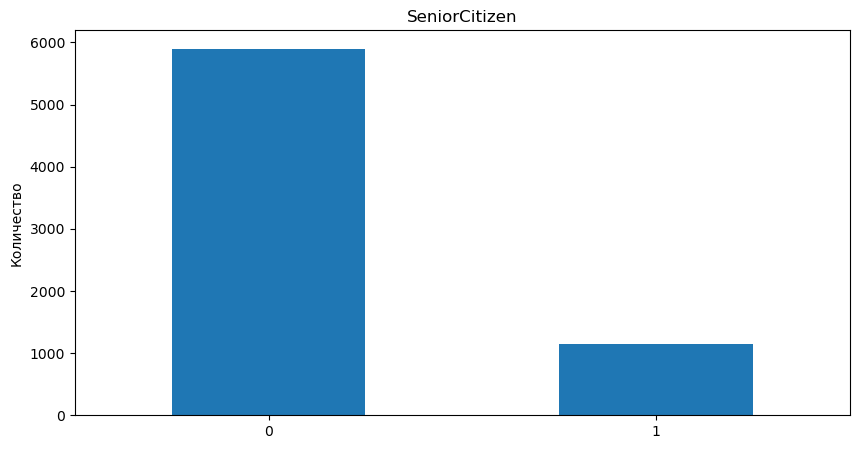

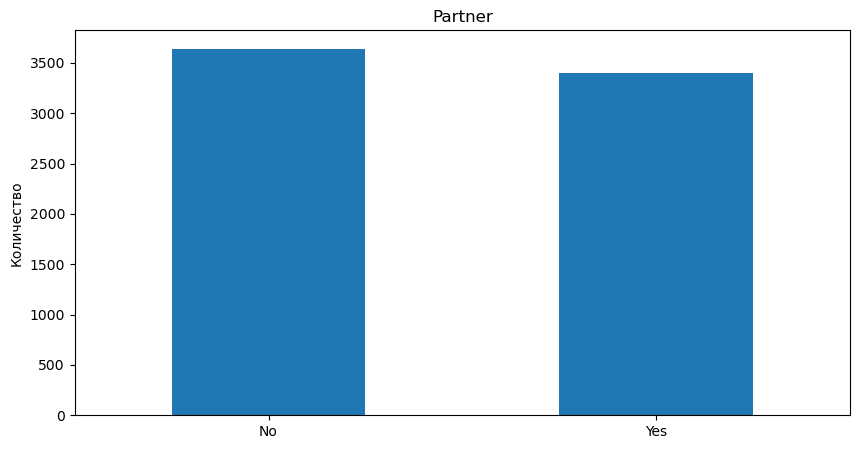

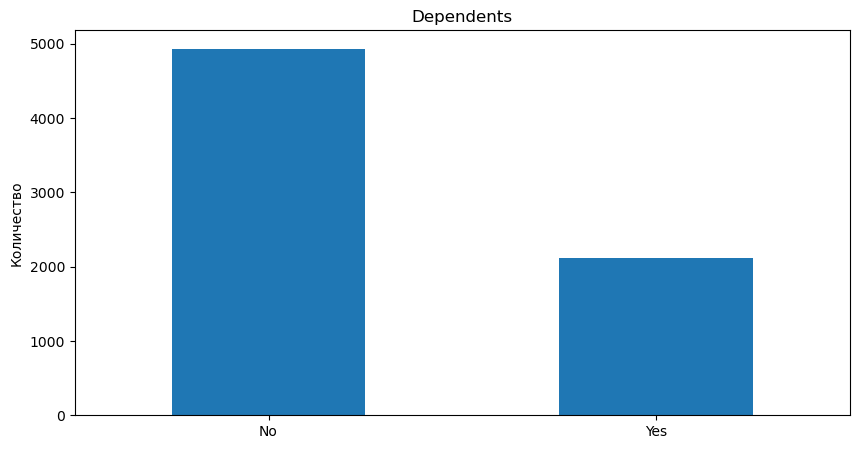

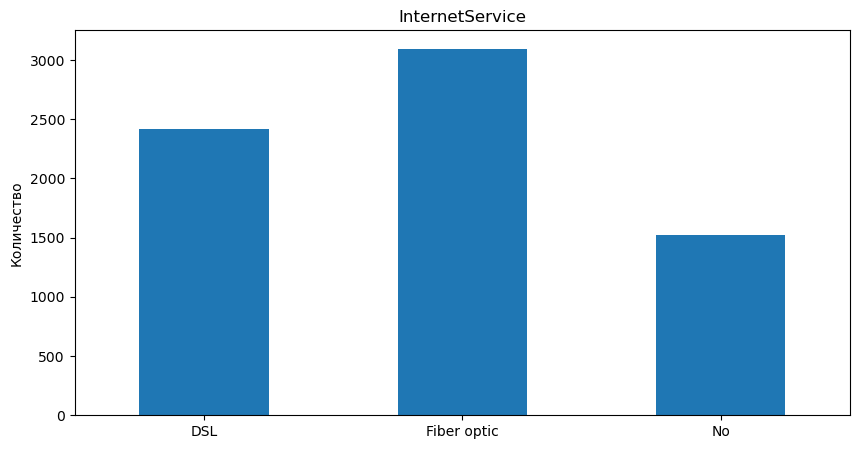

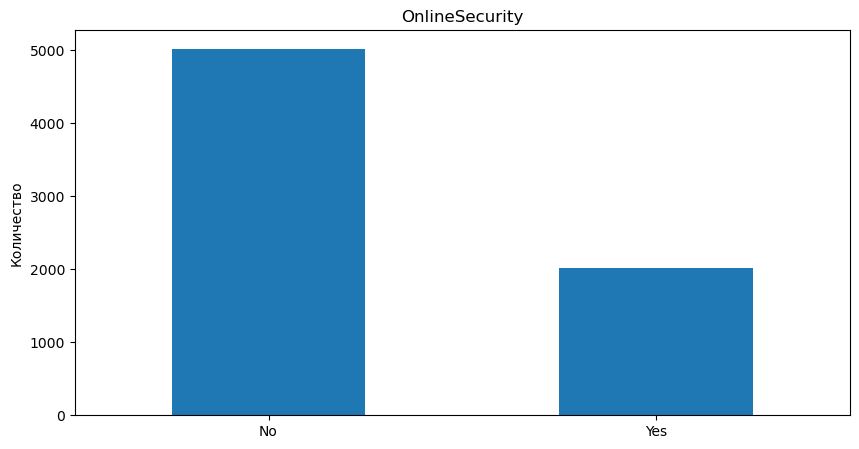

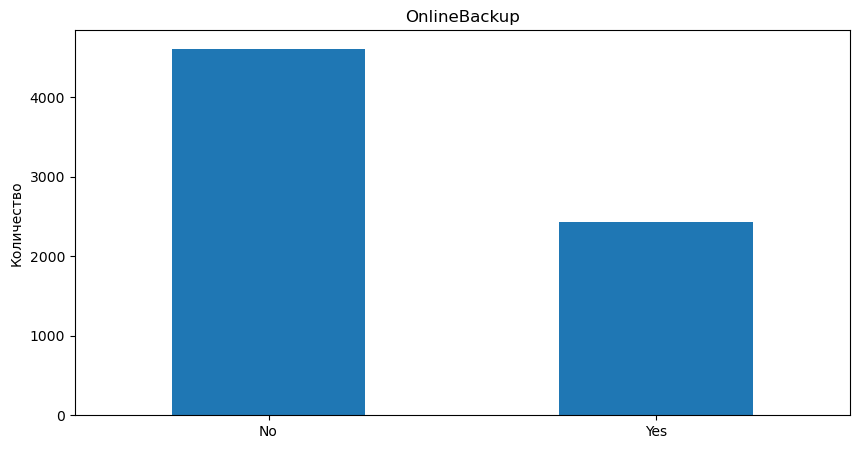

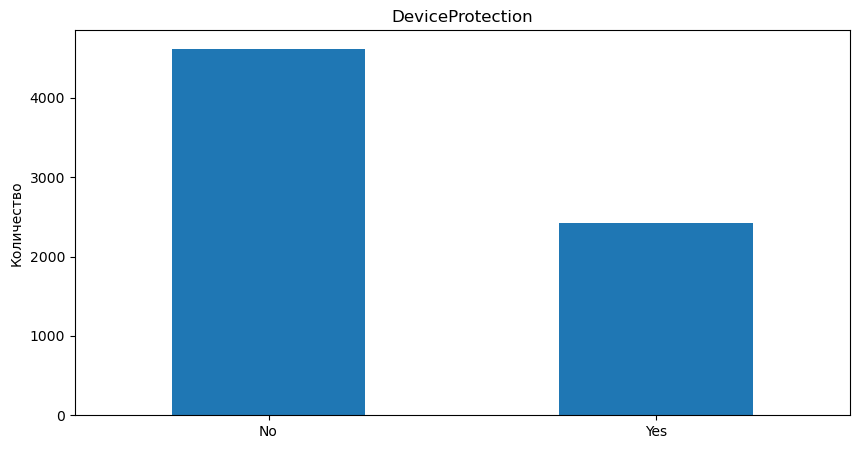

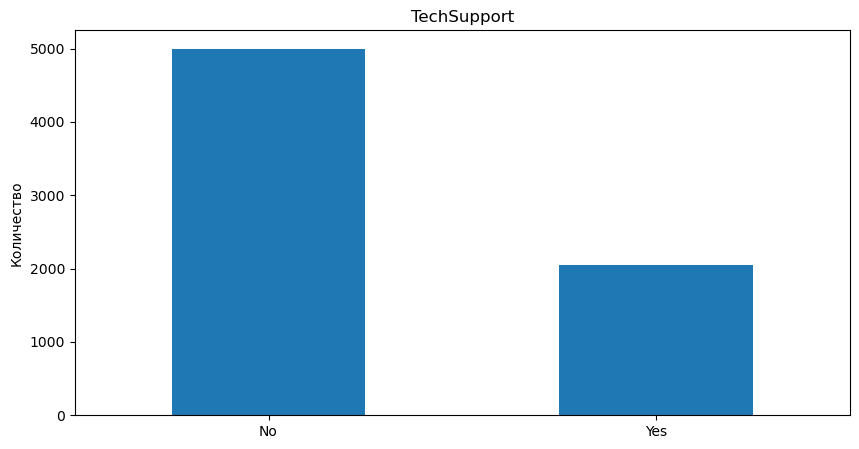

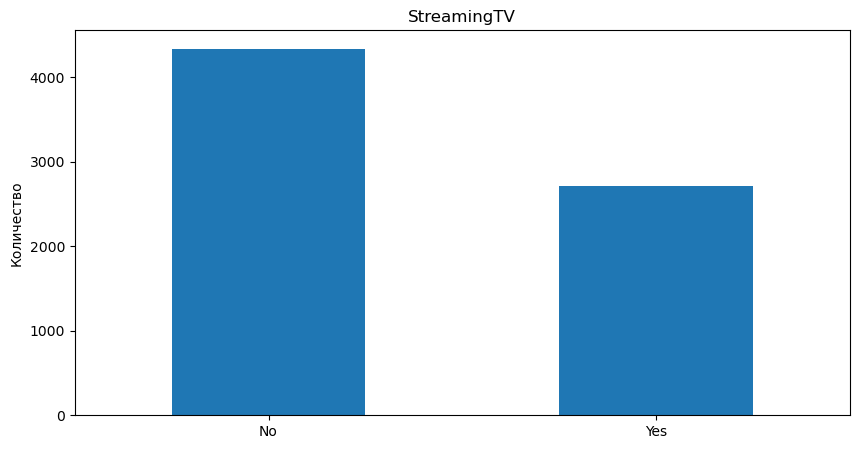

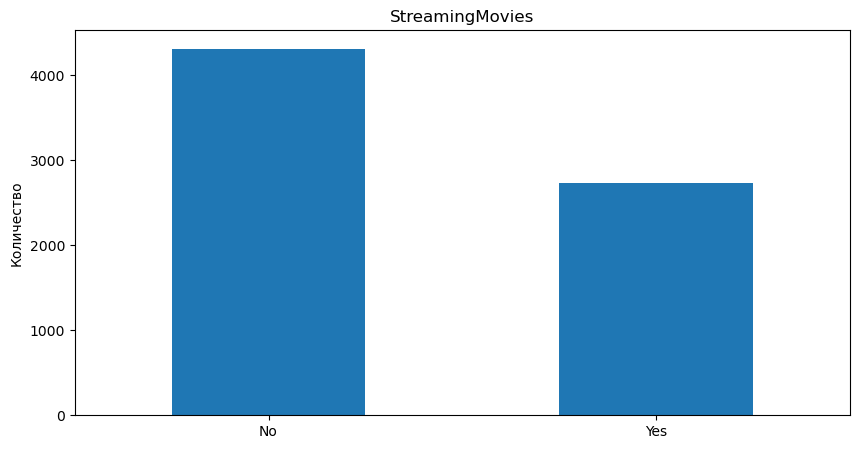

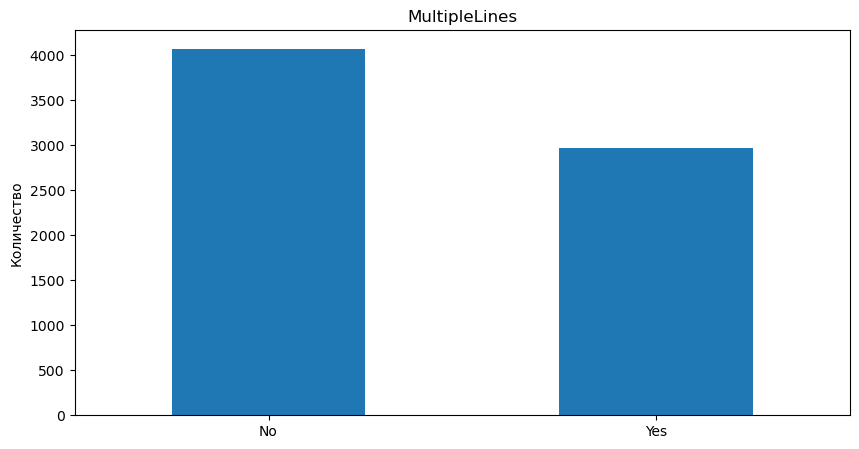

In [40]:
for col in cat_features:
    plt.figure(figsize=(10, 5))
    data.pivot_table(index=col, aggfunc='size').plot(kind='bar')
    plt.title(col)
    plt.ylabel('Количество')
    plt.xlabel('')
    plt.xticks(rotation='horizontal')
    plt.show()

Исходя из гистограмм можно сделать следующие выводы:
- Самый популярный тариф оплаты - помесяцный
- Саымый популярный способ оплаты - безналично с помощью электронного чека
- Соотношение полов и наличия супруга(-и) примерно равное
- Подавляющее количество клиентов не имеют пенсионного статуса и иждивенцев
- Услуги стриминга фильмов, телевиденья, выделенной линии технической поддержки, антивируса, онлайн бэкапа и блокировки небезопасных сайтов пользуются не сильной популярностью среди клиентов
- Самый популярный способ подключения клиентов к интернету - по оптоволоконному кабелю
- Почти у половины клиентов подключена услуга ведения параллельных линий во время звонка

## Проверка мультиколлинеарности

Перед кодированием признаков разобьем данные на обучающую и тестовую выборки в соотношении 3/1

Для алгоритма *CatBoostClassifier* создадим отдельные выборки, которые не будут обрабатываться OrdinalEncoder-ом

In [41]:
X = data_final.drop(['target'], axis=1)
y = data_final['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=RANDOM_STATE)
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

X_train_cat, X_test_cat = train_test_split(X, test_size=.25, random_state=RANDOM_STATE)
print(X_train_cat.shape)
print(X_test_cat.shape)

X_train_l, X_test_l = train_test_split(X, test_size=.25, random_state=RANDOM_STATE)
print(X_train_l.shape)
print(X_test_l.shape)

(5282, 18)
(1761, 18)
(5282,)
(1761,)
(5282, 18)
(1761, 18)
(5282, 18)
(1761, 18)


Для ансамблевой модели *RandomForest* закодируем признаки методом *OrdinalEncoder*

In [42]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train = oe.fit_transform(X_train)
X_test = oe.transform(X_test)

In [43]:
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)

<AxesSubplot: >

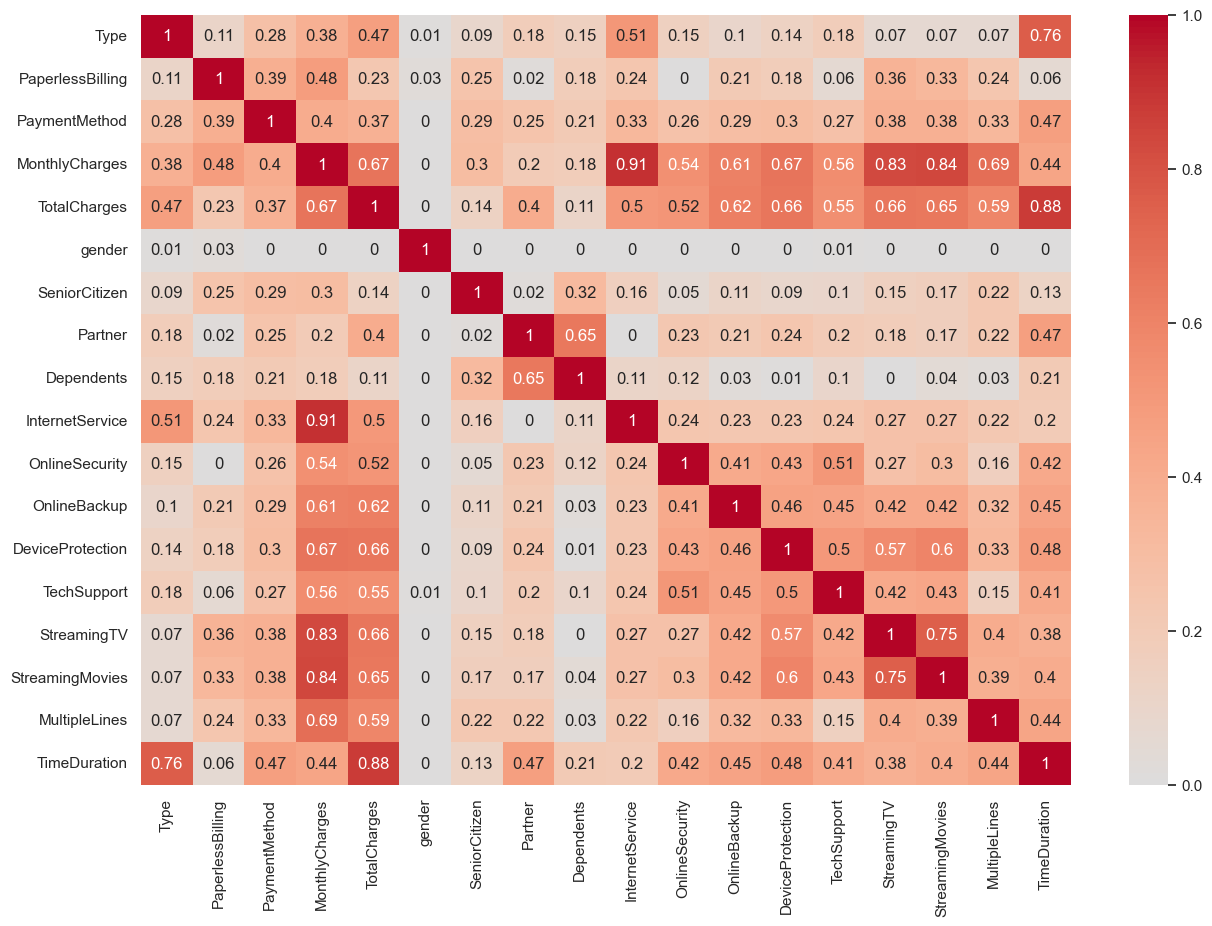

In [44]:
sns.set(rc={'figure.figsize':(15,10)})
(
    sns.heatmap(
    X_train
        .phik_matrix(interval_cols=['TotalCharges', 'MonthlyCharges', 'DateDuration'])
        .round(2), 
    cmap='coolwarm', center=0, annot=True)
);

Как видно по таблице выше, у признака *MonthlyCharges*, *StreamingMovies*, *Dependents* и *TotalCharges* заметно множественное превышение уровня корреляции с другими признаками, потому уберем их

In [45]:
X_train = X_train.drop(['MonthlyCharges', 'StreamingMovies', 'Dependents', 'TotalCharges'], axis=1)
X_test = X_test.drop(['MonthlyCharges', 'StreamingMovies', 'Dependents'], axis=1)

X_train_cat = X_train_cat.drop(['MonthlyCharges', 'StreamingMovies', 'Dependents', 'TotalCharges'], axis=1)
X_test_cat = X_test_cat.drop(['MonthlyCharges', 'StreamingMovies', 'Dependents', 'TotalCharges'], axis=1)

X_train_l = X_train_l.drop(['MonthlyCharges', 'StreamingMovies', 'Dependents', 'TotalCharges'], axis=1)
X_test_l = X_test_l.drop(['MonthlyCharges', 'StreamingMovies', 'Dependents', 'TotalCharges'], axis=1)

In [46]:
final_cat_features = ['Type',
                      'PaperlessBilling',
                      'PaymentMethod',
                      'gender',
                      'SeniorCitizen',
                      'Partner',
                      'InternetService',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'MultipleLines']

Для линейной модели *LogisticRegression* закодируем признаки методом *One-Hot-Encoder*

In [47]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='first')

encoded_train = pd.DataFrame(data=ohe.fit_transform(X_train_l[final_cat_features]).toarray())
encoded_test = pd.DataFrame(data=ohe.transform(X_test_l[final_cat_features]).toarray())

X_train_l = (
    X_train_l
    .reset_index(drop=True)
    .join(encoded_train)
    .drop(final_cat_features, axis=1)
)

X_test_l = (
    X_test_l
    .reset_index(drop=True)
    .join(encoded_test)
    .drop(final_cat_features, axis=1)
)

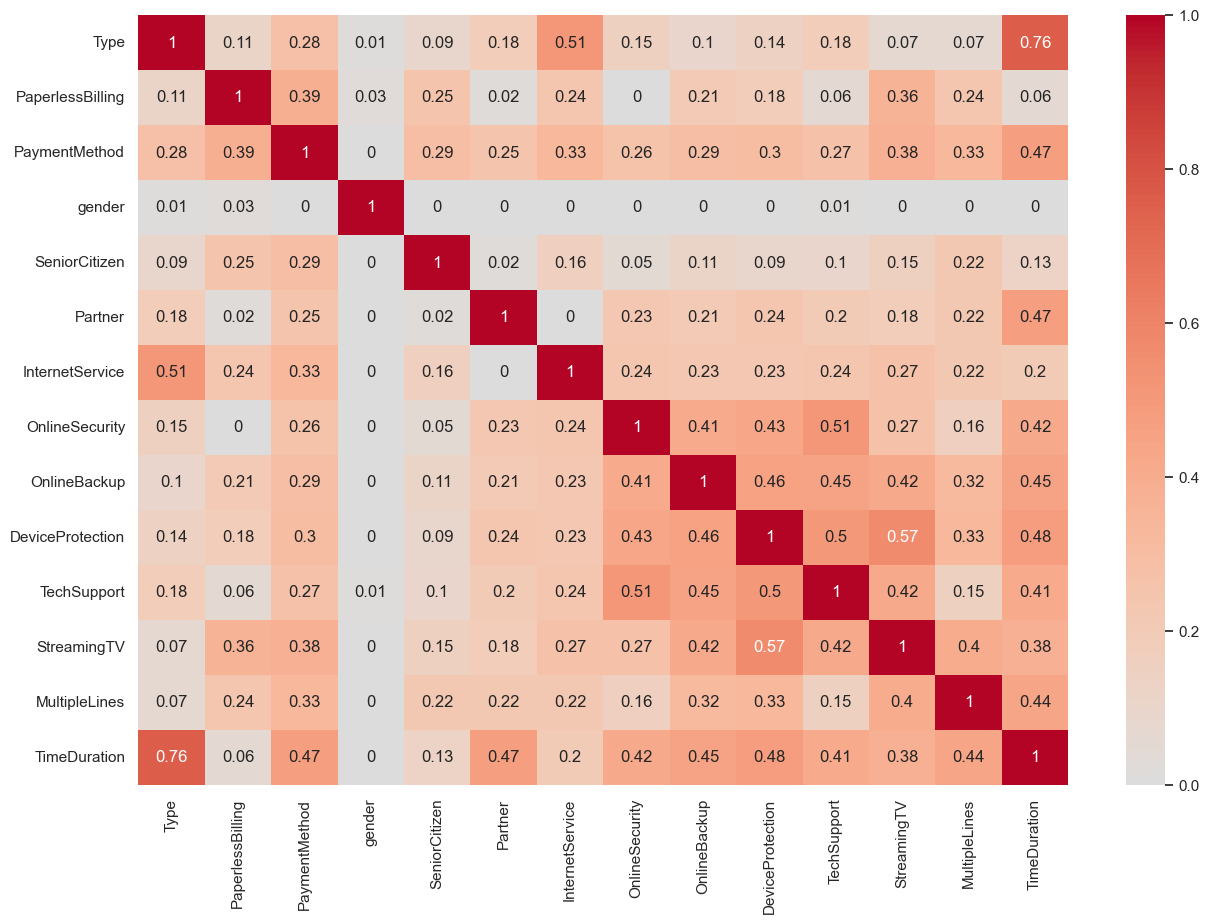

In [48]:
(
    sns.heatmap(
    X_train
        .phik_matrix(interval_cols=['TotalCharges', 'DateDuration'])
        .round(2), 
    cmap='coolwarm', center=0, annot=True)
);

По итогам исследовательского анализа данных и проверки их на мультиколлинеарность, можно отметить следующее:
- Видны пики значений на минимальных и максимальных значениях гистограммы *TimeDuration*, что свидетельствует о том, что среди клиентов оператора много как новичков, так и много лояльных старых клиентов
- Изначально у компании были очень дорогие тарифы, которые с течением времени начали сильно снижаться, особенно в конце 2019 года, что так же могло привести к потере старых клиентов, платящих за те же услуги гораздо больше новичков
- В гистограмме признака *TotalCharges* можно отметить аномально высокий пик у нуля, что так же свидетельствует о том, что среди клиентов компании много новичков, также заметны выбросы на боксплоте, что вероятно всего свидетельствует о некотором количестве старых клиентов, заплативших оператору за все время пользования услугами большие деньги 
- Самый популярный тариф оплаты - помесяцный
- Саымый популярный способ оплаты - безналично с помощью электронного чека
- Соотношение полов и наличия супруга(-и) примерно равное
- Подавляющее количество клиентов не имеют пенсионного статуса и иждивенцев
- Услуги стриминга фильмов, телевиденья, выделенной линии технической поддержки, антивируса, онлайн бэкапа и блокировки небезопасных сайтов пользуются не сильной популярностью среди клиентов
- Самый популярный способ подключения клиентов к интернету - по оптоволоконному кабелю
- Почти у половины клиентов подключена услуга ведения параллельных линий во время звонка
- Также были убраны признаки *MonthlyCharges*, *StreamingMovies* и *Dependents* из-за множественного превышение уровня корреляции с другими признаками

## Обучение моделей

Проведем стандартизацию данных с помощью *StandardScaler*

In [49]:
scaler = StandardScaler(with_mean=False)

train_scaled = scaler.fit_transform(np.asarray(X_train['TimeDuration']).reshape(-1, 1))
test_scaled = scaler.fit_transform(np.asarray(X_test['TimeDuration']).reshape(-1, 1))

X_train['TimeDuration'] = train_scaled
X_test['TimeDuration'] = test_scaled

X_train_l['TimeDuration'] = train_scaled
X_test_l['TimeDuration'] = test_scaled

Далее обучим несколько моделей машинного обучения, а именно *RandomForest*, *CatBoostClassifier* и *LogisticRegression*, для каждой применив метод *GridSearchCV* для подбора оптимальных гиперпараметров, а так же проведем их кросс-валидацию

### RandomForest

In [50]:
%%time
model_rf = RandomForestClassifier()

rf_space={'max_depth':np.arange(5, 11),
              'n_estimators':np.arange(50, 101, step=10),
              'criterion':['gini','entropy'],
         }
rf_grid = GridSearchCV(model_rf, rf_space, scoring='roc_auc')
model_grid = rf_grid.fit(X_train, y_train)

print('Лучшие гиперпараметры: ', str(model_grid.best_params_))
print('CrossVal ROC-AUC score: ', model_grid.best_score_)

Лучшие гиперпараметры:  {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 50}
CrossVal ROC-AUC score:  0.8339258334468219
CPU times: user 47.3 s, sys: 326 ms, total: 47.7 s
Wall time: 47.7 s


### CatBoost

In [51]:
%%time
model_cb = CatBoostClassifier(random_state=RANDOM_STATE,
                              cat_features=final_cat_features,
                              verbose=100)

cb_space={'iterations':np.arange(100, 500, step=100),
          'learning_rate':[.1, .01],
          'depth':np.arange(1, 8)
         }
cb_grid = GridSearchCV(model_cb, cb_space, scoring='roc_auc')
model_grid_cb = cb_grid.fit(X_train_cat, y_train)

0:	learn: 0.6479925	total: 65.5ms	remaining: 6.49s
99:	learn: 0.3528350	total: 129ms	remaining: 0us
0:	learn: 0.6489760	total: 592us	remaining: 58.6ms
99:	learn: 0.3500004	total: 65.6ms	remaining: 0us
0:	learn: 0.6478107	total: 936us	remaining: 92.8ms
99:	learn: 0.3541442	total: 63.1ms	remaining: 0us
0:	learn: 0.6477067	total: 588us	remaining: 58.3ms
99:	learn: 0.3484855	total: 60.6ms	remaining: 0us
0:	learn: 0.6476908	total: 651us	remaining: 64.5ms
99:	learn: 0.3512094	total: 58.6ms	remaining: 0us
0:	learn: 0.6884192	total: 534us	remaining: 52.9ms
99:	learn: 0.4701392	total: 63.6ms	remaining: 0us
0:	learn: 0.6885221	total: 568us	remaining: 56.3ms
99:	learn: 0.4696233	total: 57.8ms	remaining: 0us
0:	learn: 0.6884002	total: 747us	remaining: 74ms
99:	learn: 0.4707599	total: 54.9ms	remaining: 0us
0:	learn: 0.6883893	total: 628us	remaining: 62.2ms
99:	learn: 0.4697965	total: 58.6ms	remaining: 0us
0:	learn: 0.6883877	total: 545us	remaining: 54ms
99:	learn: 0.4702581	total: 57.6ms	remaining:

In [52]:
print('Лучшие гиперпараметры: ', str(model_grid_cb.best_params_))
print('CrossVal AUC-ROC score: ', model_grid_cb.best_score_)

Лучшие гиперпараметры:  {'depth': 5, 'iterations': 400, 'learning_rate': 0.1}
CrossVal AUC-ROC score:  0.9311401512195673


### LogisticRegression

In [53]:
%%time
model_lr = LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)

lr_space={'solver':['lbfgs', 'liblinear'],
         'C':[1, 10, 100, 1000]}

lr_grid = GridSearchCV(model_lr, lr_space, scoring='roc_auc')
model_grid = lr_grid.fit(X_train, y_train)

cv_score = cross_val_score(model_lr, X_train, y_train, scoring='roc_auc', cv=5)
print('Лучшие гиперпараметры: ', str(model_grid.best_params_))
print('CrossVal ROC-AUC score: ', cv_score.mean())

Лучшие гиперпараметры:  {'C': 1, 'solver': 'lbfgs'}
CrossVal ROC-AUC score:  0.7413906863789782
CPU times: user 2.35 s, sys: 738 ms, total: 3.08 s
Wall time: 526 ms


По итогу кросс-валидации моделей, лучшие результаты показал *CatBoostClassifier*, потому в дальнейшем тестировании будем использовать именно его

## Тестирование модели CatBoost

Обучим модель *CatBoostClassifier* с оптимальными гиперпараметрами, и построим ROC-кривую

In [54]:
model = model_grid_cb.best_estimator_

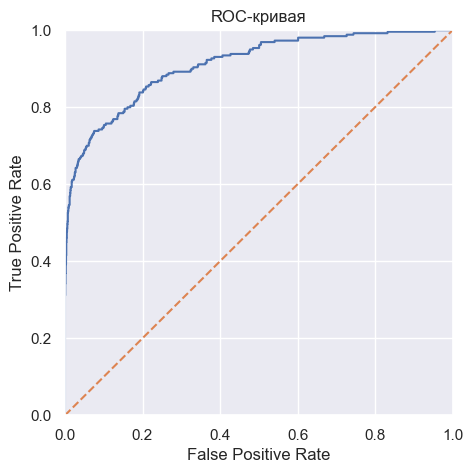

Значение метрики AUC-ROC: 0.911248910982422


In [55]:
predictions = model.predict(X_test_cat)
probabilities_test = model.predict_proba(X_test_cat)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr)

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

print('Значение метрики AUC-ROC:', roc_auc_score(y_test, probabilities_one_test))

Целевая метрика на тестовых данных показала результат ~0.91, что подходит пороговому значению задачи

Посмотрим на матрицу ошибок полученной модели

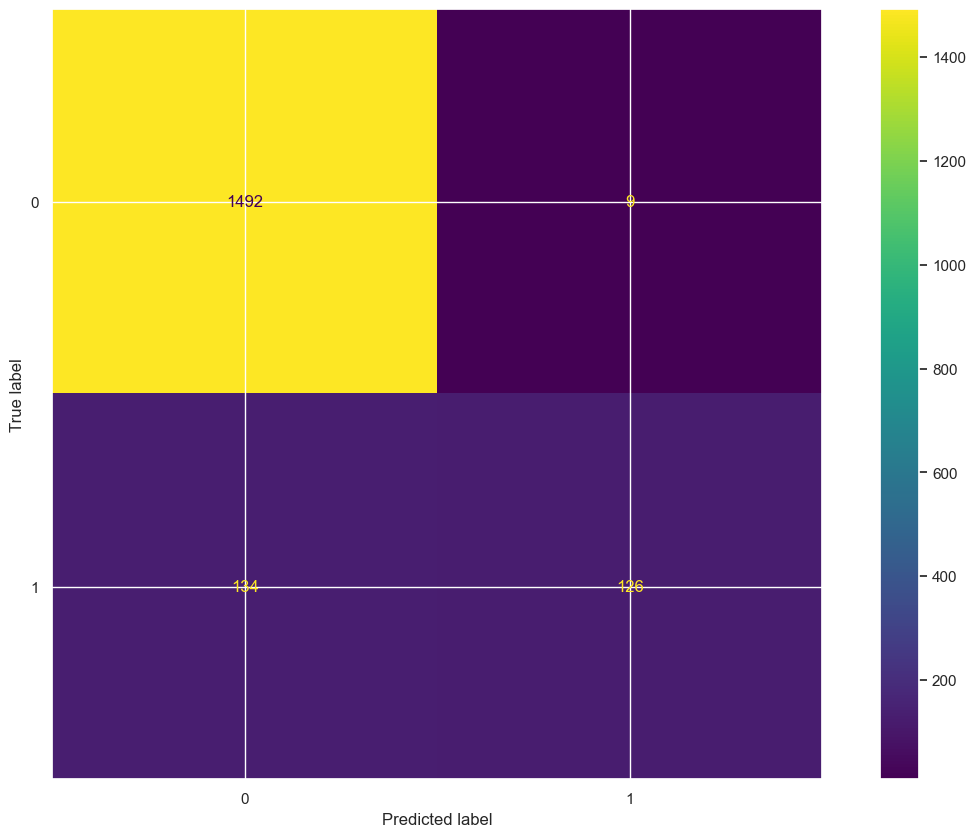

In [61]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Как видно из матрицы выше, модель хорошо научилась определять действующих клиентов, но также заметно высокое значение ложноотрицательных ответов об ушедших клиентах

Вычислим accuracy score для итоговой модели

In [57]:
score = accuracy_score(y_test, predictions)
print(f'Accuracy score = {score}')

Accuracy score = 0.9187961385576378


Посмотрим на таблицу значимости признаков

In [58]:
(
    pd.DataFrame(data=model.feature_importances_,
                 index=X_train_cat.columns,
                 columns=['importances'])
    .sort_values('importances', ascending=False)
    .style.background_gradient('coolwarm')
)

,importances
TimeDuration,65.259400
Type,8.790028
InternetService,4.788493
PaymentMethod,4.290065
MultipleLines,3.564122
Partner,3.368088
OnlineBackup,2.278000
DeviceProtection,1.692773
StreamingTV,1.673370
OnlineSecurity,1.180694


Как видно по таблице выше, самым важным признаком оказался *TimeDuration*, то есть время, отражающее сколько клиент пользуется услугами компании-оператора.

Далее по значимости идут суммарные траты клиента, тип оплаты и метод оплаты тарифов, самыми же незначительными оказались подключенные услуги, наличие пенсионного статуса, тип рассчета и пол клиента.

Было обучено три модели машинного обучения - это *RandomForest*, *CatBoostClassifier* и *LogisticRegression*, результаты кросс-валидации которых показали, что, с учетом оптимизации, самой быстрой, но наименее точной моделью (Cross-val ROC-AUC score = 0.74) оказалась *LogisticRegression*, а самой точной, но самой медленной - CatBoostClassifier показателем целевой метрики ~0.93 на кросс-валидации и 0.91 на тестовых данных.

## Отчёт

В ходе данного исследовнаия мною были проделаны следующие шаги:

- **Предобработка данных**

В ходе этого этапа, были загружены и изучены все исходные датасеты, исправлены ошибки в типах данных, проверены дубликаты и заполненны пропуски, обнаруженные в таблице *contracts* у новых клиентов. Также на основе признака *EndDate* был созда бинарный целевой признак *target*, значения в котором 0, если клиент все ещё дествующий, и 1 - если контракт с клиентом расторгнут

- **Соединение данных в единый датасет**

На этом этапе все датасеты были соединены в один, а образовавшиеся в данных пропуски заполнены нулями, так как подразумевается что они появились только в графах тех услуг, которые не были подключены у пользователей

- **Проведение исследовательского анализа данных, создание новых признаков**

Был создан новый признак *TimeDuration*, который содержит продолжительность (в днях) пользования услугами оператора клиентом
В ходе исследовательского анализа данных, было выявленно следующее:
- В гистограмме признака "Суммарные траты" можно отметить аномально высокий пик у нуля, что так же свидетельствует о том, что среди клиентов компании много новичков, также заметны выбросы на боксплоте, что вероятнее всего свидетельствует о некотором количестве старых клиентов, заплативших оператору за все время пользования услугами большие деньги 
- Видны пики значений на минимальных и максимальных значениях гистограммы *TimeDuration*, что свидетельствует о том, что среди клиентов оператора много как новичков, так и много лояльных старых клиентов
- Самый популярный тариф оплаты - помесяцный
- Саымый популярный способ оплаты - безналично с помощью электронного чека
- Соотношение полов и наличия супруга(-и) примерно равное
- Подавляющее количество клиентов не имеют пенсионного статуса и иждивенцев
- Самый популярный способ подключения клиентов к интернету - по оптоволоконному кабелю
- Почти у половины клиентов подключена услуга ведения параллельных линий во время звонка


- **Разделение данных на обучающую и тестовую выборки**

Данные были разделены на обучающую и тестовую выборки в соотношении 3:1, также из-за особенности обработки категориальных признаков были созданы отдельные выборки для модели машинного обучения *CatBoostClassifier*

- **Выявление взаимосвязей между признаками**

Были обнаруженны и удалены из датасета признаки с высокой мультиколлинеарностью, а именно *MonthlyCharges*, *StreamingMovies*, *Dependents* и *TotalCharges*

Итоговый список признаков для обучения моделей:
- 'Type' - тип оплаты: ежемесячный, годовой и тд
- 'PaperlessBilling' - электронный платёжный документ
- 'PaymentMethod' -  способ оплаты 
- 'gender' - пол
- 'SeniorCitizen' -  наличие пенсионного статуса по возрасту
- 'Partner' - наличие супруга(и)
- 'InternetService' -  тип подключения к интернету
- 'OnlineSecurity' - блокировка небезопасных сайтов
- 'OnlineBackup' - облачное хранилище файлов для резервного копирования данных
- 'DeviceProtection' -  антивирус
- 'TechSupport' - выделенная линия технической поддержки
- 'StreamingTV' - стриминговое телевидение
- 'MultipleLines' -  наличие возможности ведения параллельных линий во время звонка
- 'TimeDuration' - продолжительность пользования услугами оператора в днях


- **Стандартизация данных**

Для моделей логистической регрессии и случайного леса данные были закодированны с помощью *OrdinalEncoder* и стандантизированны с помощью *StandardScaller*

- **Подбор и оптимизация нескольких алгоритмов машинного обучения**

Были подобраны оптимальные гиперпараметрыи проведена кросс-валидация для моделей *LogisticRegression* (CrossVal score:  0.74), *RandomForest* (CrossVal score:  0.83) и *CatBoostClassifier* (CrossVal score:  0.93)

- **Тестирование лучшего алгоритма машинного обучения**

По итогам кросс-валидации была выбрана модель *CatBoostClassifier* со следующими гиперпараметрами:
```
{'depth': 5, 'iterations': 400, 'learning_rate': 0.1}
```

На тестовой выборке модель показала значения метрик *Accuracy* = 0.92 и *AUC-ROC* = 0.91

- **Проведение оценки важности признаков лучшей модели и построение матрицы ошибок**
```
	                     importances
TimeDuration	       | 65.259400
Type	               | 8.790028
InternetService	    | 3.896219
PaymentMethod	      | 4.290065
MultipleLines	      | 3.564122
Partner	            | 3.368088
OnlineBackup	       | 2.278000
DeviceProtection       | 1.692773
StreamingTV	        | 1.673370
OnlineSecurity	     | 1.180694
SeniorCitizen	      | 1.126722
TechSupport	        | 0.695433
gender	             | 0.682016
PaperlessBilling       | 0.610795
```

После оценки важности признаков было выявленно, что самым важным признаком оказался *TimeDuration*, то есть время, отражающее сколько клиент пользуется услугами компании-оператора. Далее по значимости идут суммарные траты клиента, тип оплаты и метод оплаты тарифов, самыми же незначительными оказались подключенные услуги, наличие пенсионного статуса, тип рассчета и пол клиента.
```
array([[1489,   12],
       [ 137,  123]])
```

А матрица ошибок показала, что модель хорошо научилась определять действующих клиентов, но также заметно высокое значение ложноположительных ответов 

Фактическая работа полностью соответствует запланированным шагам. В ходе выполнения проекта возникали незначительные проблемы с использованием новых инструментов, проблемы решались путём изучения документации и исследования открытых источников.

Выявленные проблемы:
- Услуги стриминга фильмов, телевиденья, выделенной линии технической поддержки, антивируса, онлайн бэкапа и блокировки небезопасных сайтов пользуются не сильной популярностью среди клиентов
- Изначально у компании были очень дорогие тарифы, стоимость которых с течением времени начали сильно снижаться, особенно в конце 2019 года, что так же могло привести к потере старых клиентов, платящих за те же услуги гораздо больше новичков

Рекомендации для бизнеса:
- Пересмотреть ценовую политику для старых клиентов, чьи тарифы оплаты услуг гораздо выше, чем у новых клиентов
- Ввести программу лояльности, которая будет предлагать особые условия обслуживания в зависимости от продолжения пользования услугами оператора
- Пересмотреть политику продвижения дополнительных услуг среди клиентов